In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ! pip install seaborn

In [277]:
data =  pd.read_excel('data/Data.xlsx')
data.head()

,ID,X1,X2,X3,Z1,Z2,A,B,Y
0,1001,6.44,2.0,1.00,5,16.0,738,0.0,11.0
1,1002,0.00,0.0,0.00,4,2.0,315,0.0,0.0
2,1003,18.50,3.0,2.50,108,64.0,11415,205302.1,21.0
3,1004,4.32,1.0,0.50,0,6.0,561,0.0,7.0
4,1005,0.00,0.0,7.16,890,55.0,0,0.0,0.0


In [278]:
data_without_0 = data[data['Y'] != 0]
data_without_0.shape

(30, 9)

## Data Splitting

In [279]:
X = data_without_0.drop('Y',axis=1)
X.drop('ID',axis=1,inplace=True)
y = data_without_0['Y']


#### Replacing null values with columns mean

In [280]:
X.fillna(X.mean(),inplace=True)

In [281]:
X.shape

(30, 7)

## Feature Scaling

In [282]:
# Scaling data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled.head()

,X1,X2,X3,Z1,Z2,A,B
0,-1.107300,-0.603281,-0.789465,-0.859053,-0.827104,-1.157882,-0.665381
1,0.048193,-0.377559,-0.551212,-0.527534,-0.259667,0.186894,-0.584937
2,-1.310422,-0.829004,-0.868882,-0.875146,-0.945320,-1.180175,-0.665381
3,0.880800,0.714938,1.783668,0.125849,-0.354240,1.782061,1.991174
4,-0.123310,-0.151836,-0.630629,1.310305,0.567844,0.313223,-0.595456


In [283]:
# removing outliers using z score technique
# from scipy import stats
# z = np.abs(stats.zscore(X_scaled))
# X_scaled = X_scaled[(z < 3).all(axis=1)]
# # y = y[(z < 3).all(axis=1)]

# X_scaled.shape

## Clustering

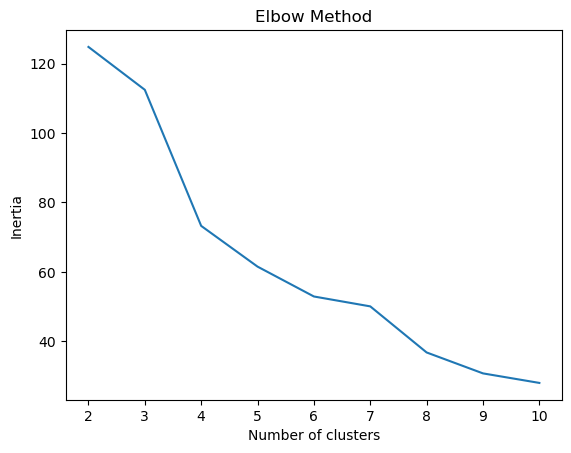

In [284]:
from sklearn.cluster import KMeans


#setting random seed for reporducibility
np.random.seed(123)


### Elbow Method

# elbow method to determine the number of clusters
inertia = []


from sklearn.metrics import silhouette_score
silhouette = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled,kmeans.labels_))


plt.plot(range(2,11),inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.show()

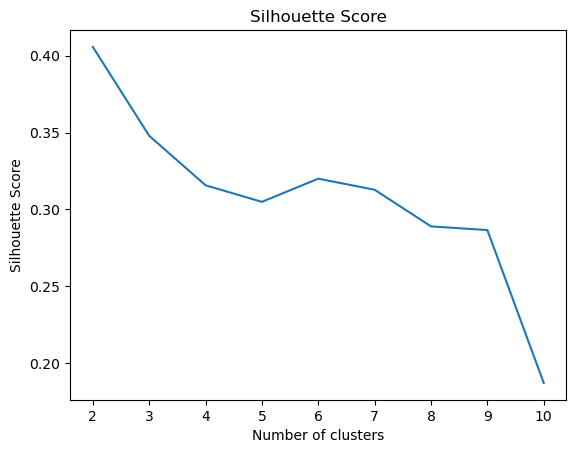

In [285]:
#po=lotting shiloutte score
plt.plot(range(2,11),silhouette)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.show()


In [286]:
# clustering the data
import random
random.seed(123)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state = 45)
kmeans.fit(X_scaled)
X_scaled['4_clusters_all_features'] = kmeans.predict(X_scaled)

In [287]:
X_scaled['4_clusters_all_features'].value_counts()

4_clusters_all_features
0    13
2     8
1     6
3     3
Name: count, dtype: int64

In [288]:
# clustering the data
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state = 45)
kmeans.fit(X_scaled[['X1','X2']])
X_scaled['4_clusters_X1X2'] = kmeans.predict(X_scaled[['X1','X2']])

X_scaled['4_clusters_X1X2'] .value_counts()


4_clusters_X1X2
1    15
0     8
2     4
3     3
Name: count, dtype: int64

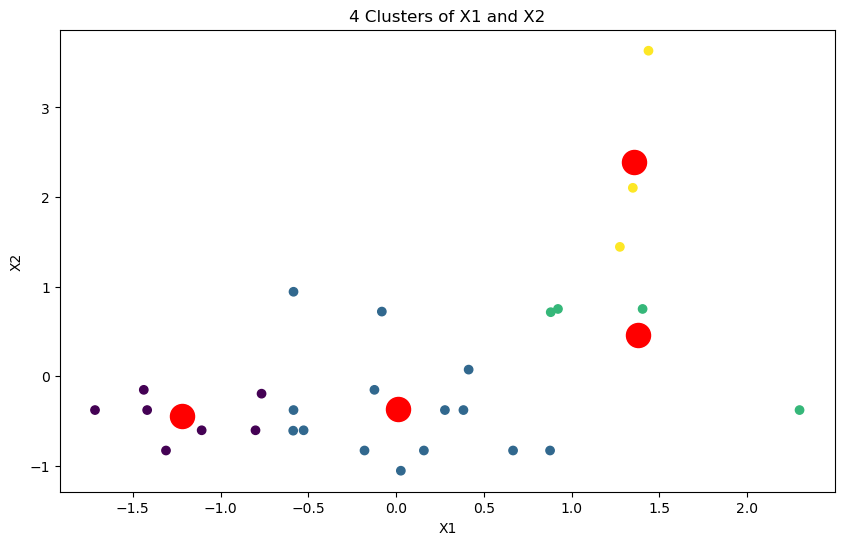

In [289]:
# plotting the clusters, along with the centroids
plt.figure(figsize=(10,6))
plt.scatter(X_scaled['X1'],X_scaled['X2'],c=X_scaled['4_clusters_X1X2'],cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red')
plt.title('4 Clusters of X1 and X2')
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

In [290]:
#PCA to extract the first two principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state = 45)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

print(X_pca.shape)
pca.explained_variance_ratio_


(30, 2)


array([0.55811365, 0.18876794])

4_clusters_pca_2
0    12
1     9
2     6
3     3
Name: count, dtype: int64


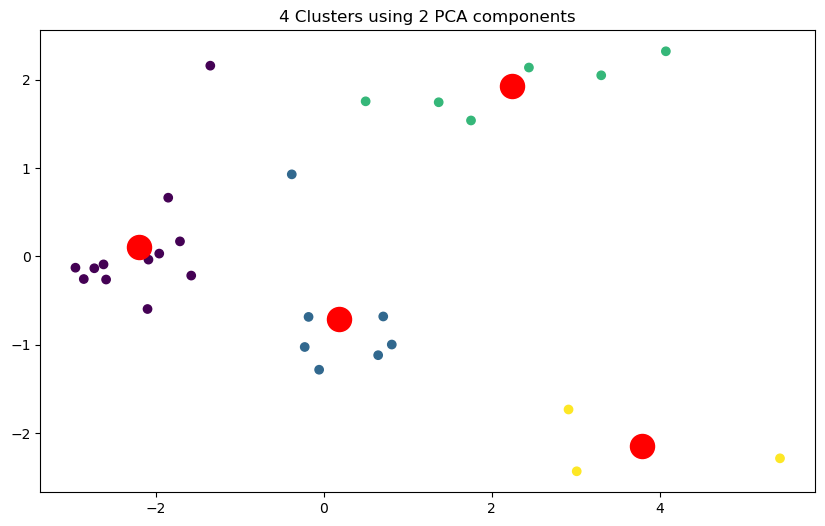

In [291]:
# perfroming clustering on the first two principal components

kmeans = KMeans(n_clusters=4, random_state = 45)
kmeans.fit(X_pca)
X_scaled['4_clusters_pca_2'] = kmeans.predict(X_pca)

print(X_scaled['4_clusters_pca_2'].value_counts())

# plotting the clusters, along with the centroids
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=X_scaled['4_clusters_pca_2'],cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red')
plt.title('4 Clusters using 2 PCA components')
plt.show()


4_clusters_pca_3
2    13
0     8
1     6
3     3
Name: count, dtype: int64


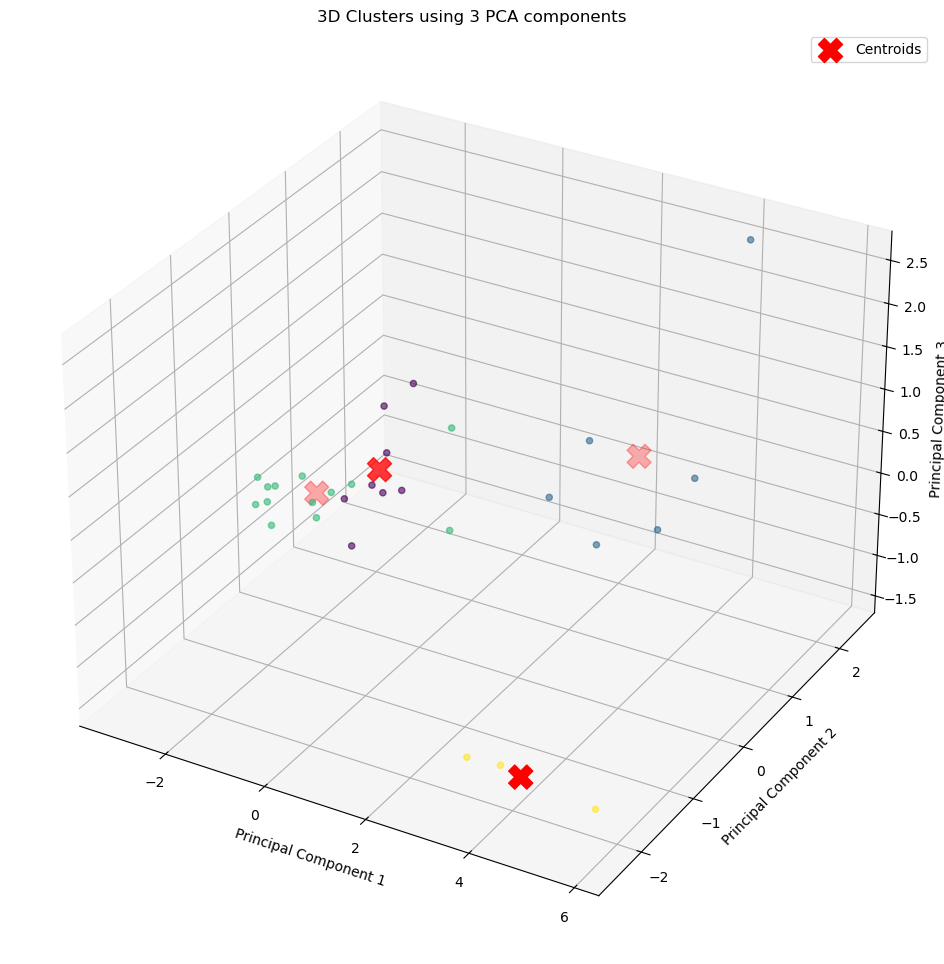

In [292]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D


# Performing PCA to reduce to 3 components
pca = PCA(n_components=3, random_state = 42)
X_pca = pca.fit_transform(X_scaled)  # Assuming X_scaled is your standardized dataset

# Applying KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_pca)
X_scaled['4_clusters_pca_3'] = kmeans.predict(X_pca)

print(X_scaled['4_clusters_pca_3'].value_counts())

# Creating a 3D scatter plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for data points
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=X_scaled['4_clusters_pca_3'], cmap='viridis', alpha=0.6)

# Scatter plot for cluster centroids
ax.scatter(kmeans.cluster_centers_[:, 0], 
           kmeans.cluster_centers_[:, 1], 
           kmeans.cluster_centers_[:, 2], 
           s=300, c='red', marker='X', label='Centroids')

# Labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Clusters using 3 PCA components')

# Show legend
ax.legend()
plt.show()


In [293]:
X_scaled = X_scaled.add_prefix("scaled_")


In [294]:
combined_df = pd.concat([X.reset_index(drop=True), X_scaled], axis=1)
combined_df = pd.concat([combined_df, y.reset_index(drop=True)], axis=1)

combined_df.columns

Index(['X1', 'X2', 'X3', 'Z1', 'Z2', 'A', 'B', 'scaled_X1', 'scaled_X2',
       'scaled_X3', 'scaled_Z1', 'scaled_Z2', 'scaled_A', 'scaled_B',
       'scaled_4_clusters_all_features', 'scaled_4_clusters_X1X2',
       'scaled_4_clusters_pca_2', 'scaled_4_clusters_pca_3', 'Y'],
      dtype='object')

In [295]:
combined_df

,X1,X2,X3,Z1,Z2,A,B,scaled_X1,scaled_X2,scaled_X3,scaled_Z1,scaled_Z2,scaled_A,scaled_B,scaled_4_clusters_all_features,scaled_4_clusters_X1X2,scaled_4_clusters_pca_2,scaled_4_clusters_pca_3,Y
0,6.44,2.00,1.00,5,16.000000,738,0.00,-1.107300,-0.603281,-0.789465,-0.859053,-0.827104,-1.157882,-0.665381,0,0,0,2,11.0
1,18.50,3.00,2.50,108,64.000000,11415,205302.10,0.048193,-0.377559,-0.551212,-0.527534,-0.259667,0.186894,-0.584937,2,1,1,0,21.0
2,4.32,1.00,0.50,0,6.000000,561,0.00,-1.310422,-0.829004,-0.868882,-0.875146,-0.945320,-1.180175,-0.665381,0,0,0,2,7.0
3,27.19,7.84,17.20,311,56.000000,24080,6779819.09,0.880800,0.714938,1.783668,0.125849,-0.354240,1.782061,1.991174,1,2,2,1,16.0
4,16.71,4.00,2.00,679,134.000000,12418,178457.41,-0.123310,-0.151836,-0.630629,1.310305,0.567844,0.313223,-0.595456,2,1,1,0,13.0
5,12.50,2.00,1.50,55,5.000000,6159,1170743.34,-0.526679,-0.603281,-0.710047,-0.698121,-0.957141,-0.475103,-0.206645,0,1,0,2,5.0
6,22.31,5.00,13.00,129,39.000000,9796,6071588.39,0.413237,0.073887,1.116560,-0.459943,-0.555207,-0.017020,1.713666,1,1,2,1,10.5
7,22.00,3.00,3.00,912,70.000000,10978,33206.96,0.383536,-0.377559,-0.471794,2.060246,-0.188738,0.131854,-0.652370,2,1,1,0,28.0
8,3.20,3.00,1.00,11,52.000000,1305,192741.55,-1.417731,-0.377559,-0.789465,-0.839741,-0.401527,-1.086468,-0.589859,0,0,0,2,6.0
9,32.07,13.99,5.00,286,84.000000,19672,69619.76,1.348363,2.103132,-0.154123,0.045383,-0.023236,1.226870,-0.638102,3,3,3,3,63.0


In [296]:
combined_df.groupby('scaled_4_clusters_all_features')['Y'].mean()

scaled_4_clusters_all_features
0    10.384615
1    21.583333
2    27.187500
3    51.000000
Name: Y, dtype: float64

In [297]:
combined_df.groupby('scaled_4_clusters_X1X2')['Y'].mean()

scaled_4_clusters_X1X2
0     8.50
1    21.40
2    23.25
3    51.00
Name: Y, dtype: float64

In [298]:
combined_df.groupby('scaled_4_clusters_pca_2')['Y'].mean()

scaled_4_clusters_pca_2
0     9.666667
1    26.277778
2    21.583333
3    51.000000
Name: Y, dtype: float64

In [299]:
combined_df.groupby('scaled_4_clusters_pca_3')['Y'].mean()

scaled_4_clusters_pca_3
0    27.187500
1    21.583333
2    10.384615
3    51.000000
Name: Y, dtype: float64

/tmp/ipykernel_232/1667822422.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=plot_data, inner="quart", palette="muted")


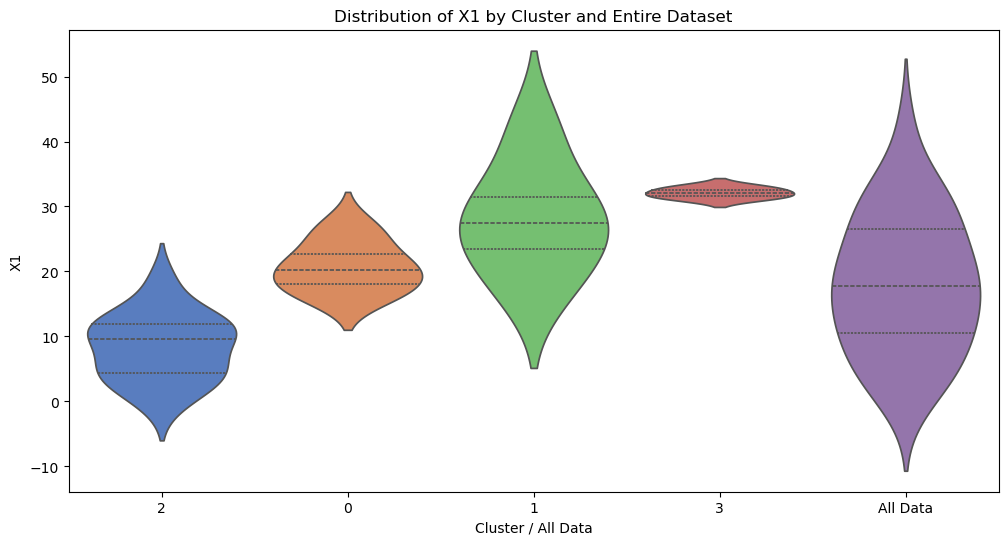

/tmp/ipykernel_232/1667822422.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=plot_data, inner="quart", palette="muted")


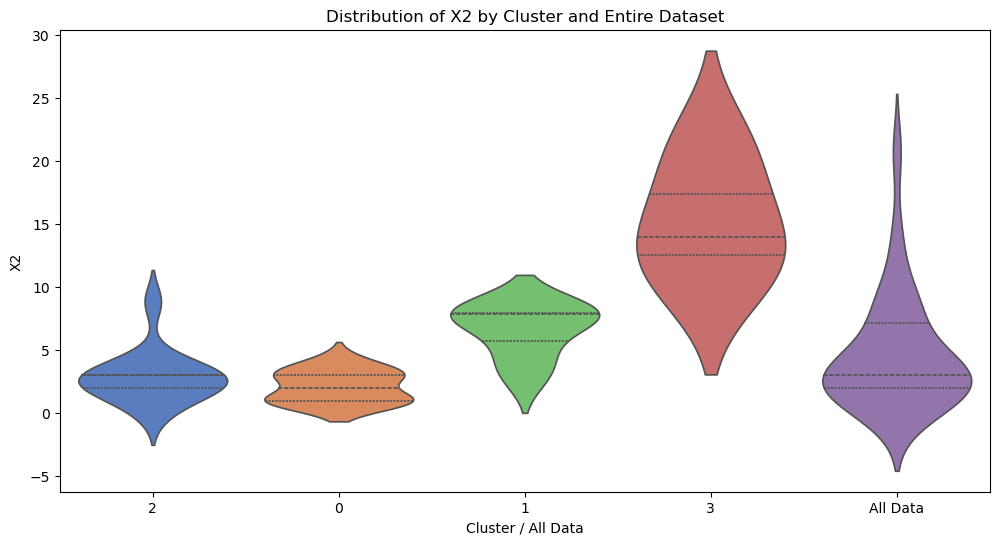

/tmp/ipykernel_232/1667822422.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=plot_data, inner="quart", palette="muted")


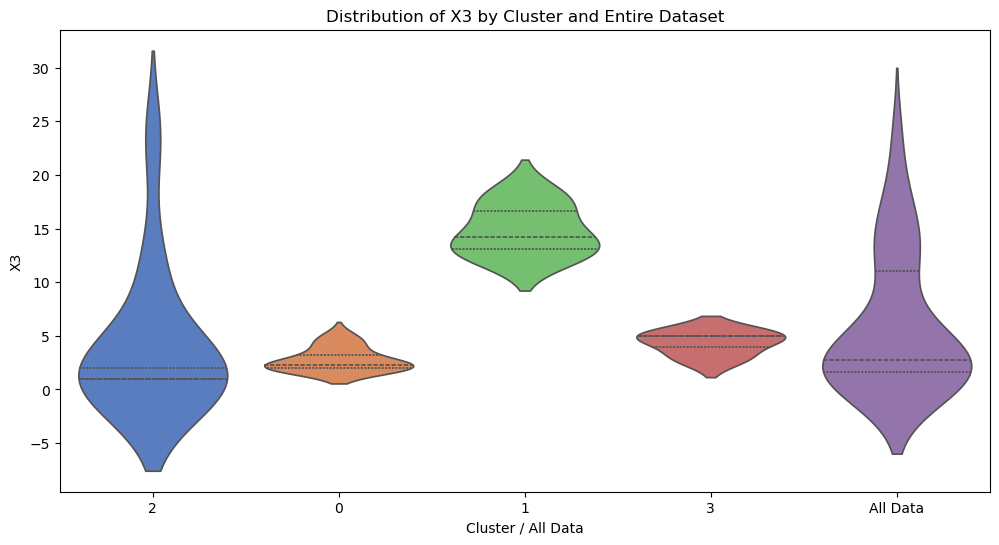

/tmp/ipykernel_232/1667822422.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=plot_data, inner="quart", palette="muted")


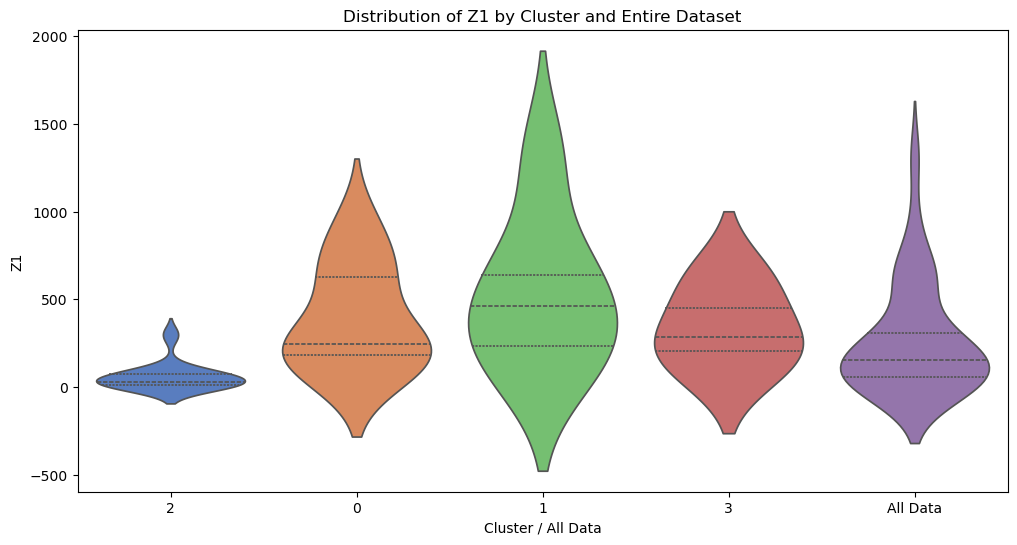

/tmp/ipykernel_232/1667822422.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=plot_data, inner="quart", palette="muted")


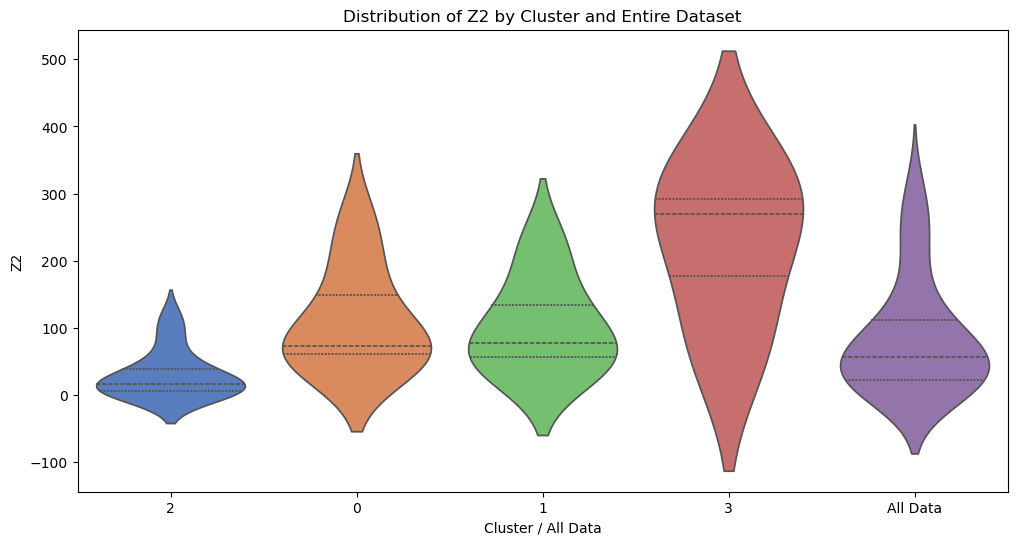

/tmp/ipykernel_232/1667822422.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=plot_data, inner="quart", palette="muted")


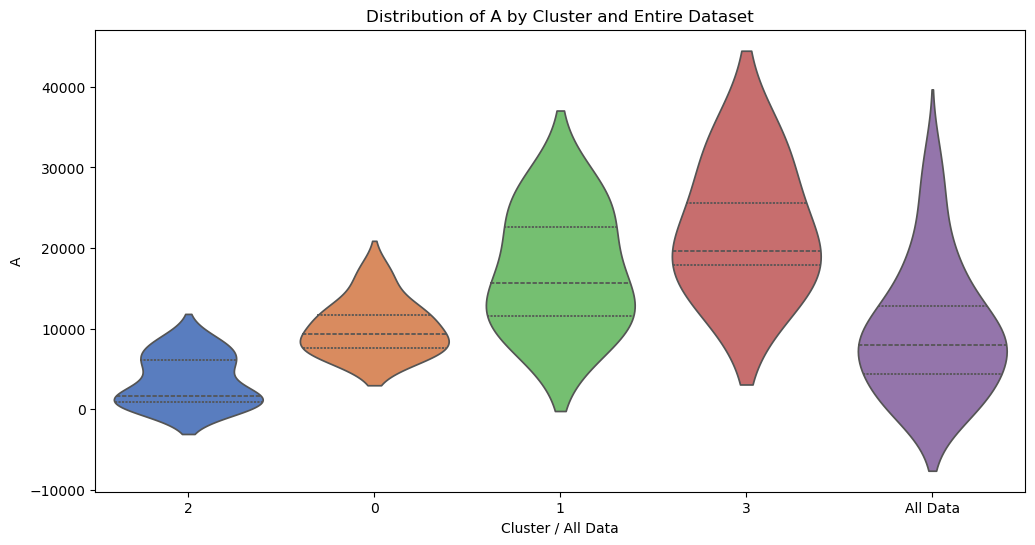

/tmp/ipykernel_232/1667822422.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=plot_data, inner="quart", palette="muted")


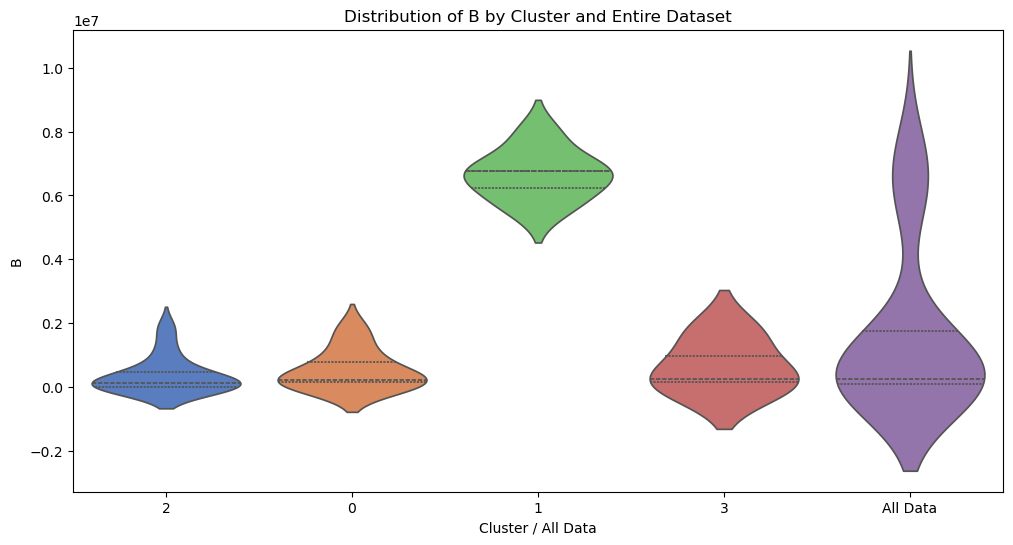

In [303]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `X_scaled` is your dataframe and '4_clusters_pca_3' contains the cluster labels

# Create a column representing the entire dataset distribution
combined_df['All Data'] = 'All Data'  # Assigning 'All Data' label to all rows

# List of features you want to plot
features = ['X1', 'X2', 'X3', 'Z1', 'Z2', 'A', 'B']  # Add more features as needed

# Create violin plots for each feature
for feature in features:
    plt.figure(figsize=(12, 6))
    
    # Combine the cluster labels with 'All Data' for comparison
    # Create a new DataFrame with an additional 'Cluster/All Data' column for comparison
    plot_data = pd.concat([combined_df[['scaled_4_clusters_pca_3', feature]], combined_df[['All Data', feature]]], axis=0)
    plot_data['Cluster'] = pd.concat([combined_df['scaled_4_clusters_pca_3'], combined_df['All Data']], axis=0)

    # Violin plot for individual clusters and the entire dataset
    sns.violinplot(x='Cluster', y=feature, data=plot_data, inner="quart", palette="muted")
    
    # Add the title and labels
    plt.title(f'Distribution of {feature} by Cluster and Entire Dataset')
    plt.xlabel('Cluster / All Data')
    plt.ylabel(feature)
    
    # Show plot
    plt.show()


/tmp/ipykernel_232/2913003195.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=plot_data, inner="quart", palette="muted")


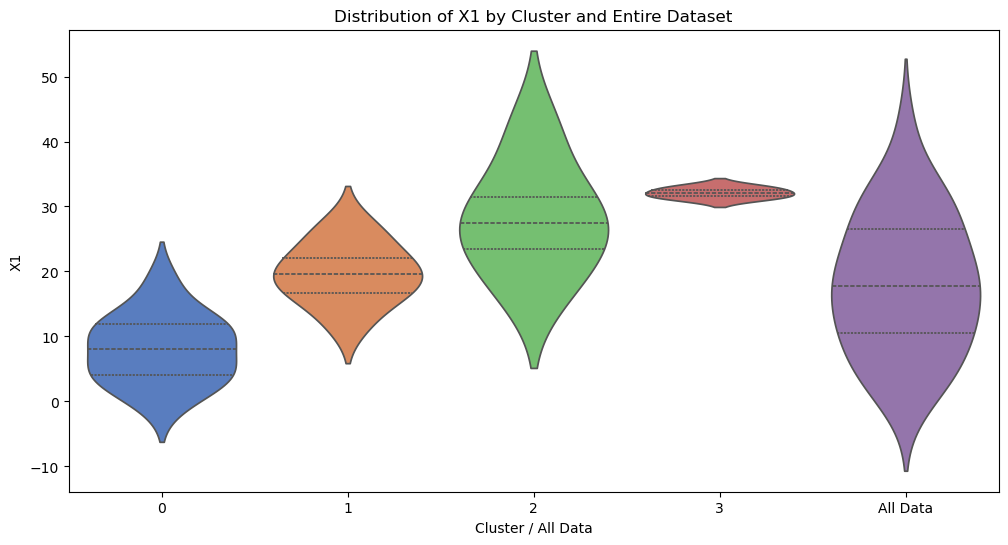

/tmp/ipykernel_232/2913003195.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=plot_data, inner="quart", palette="muted")


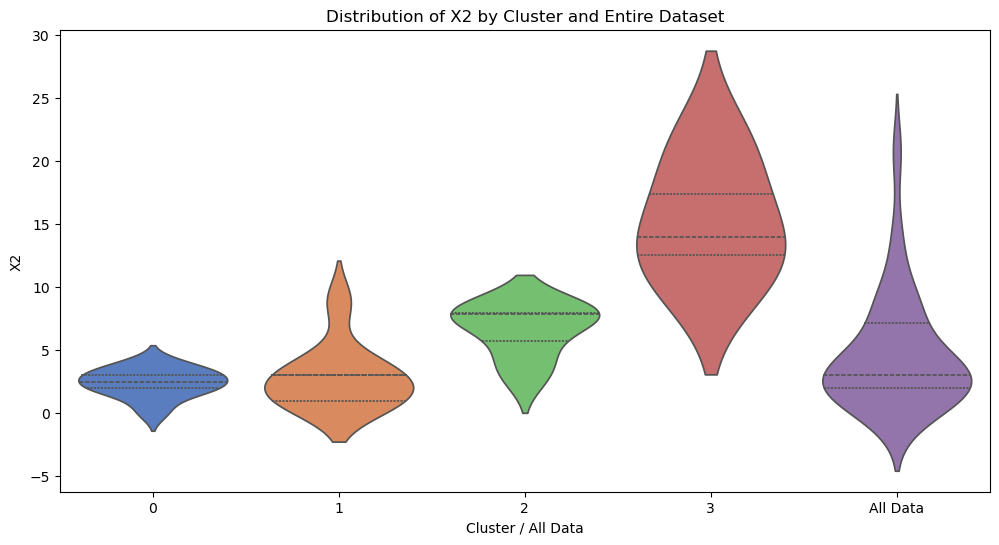

/tmp/ipykernel_232/2913003195.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=plot_data, inner="quart", palette="muted")


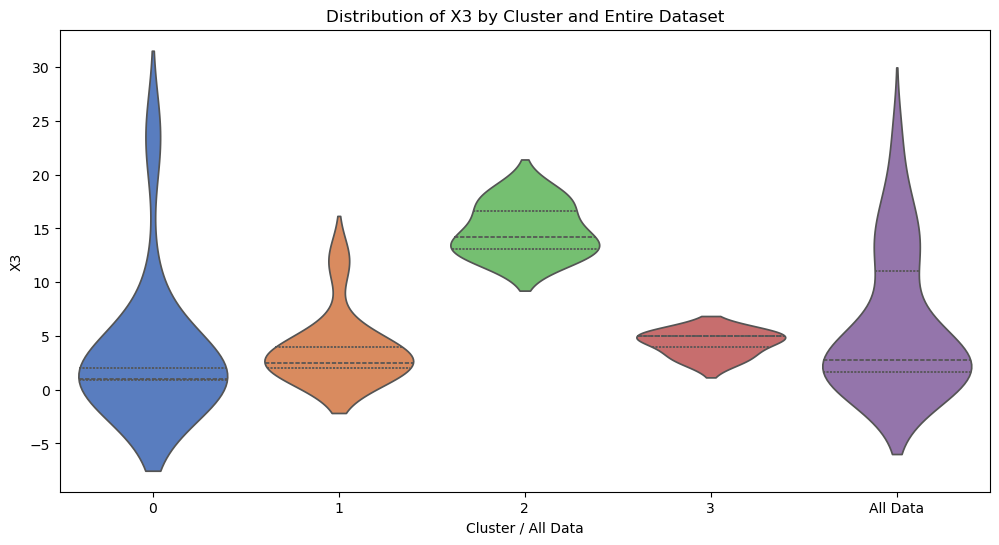

/tmp/ipykernel_232/2913003195.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=plot_data, inner="quart", palette="muted")


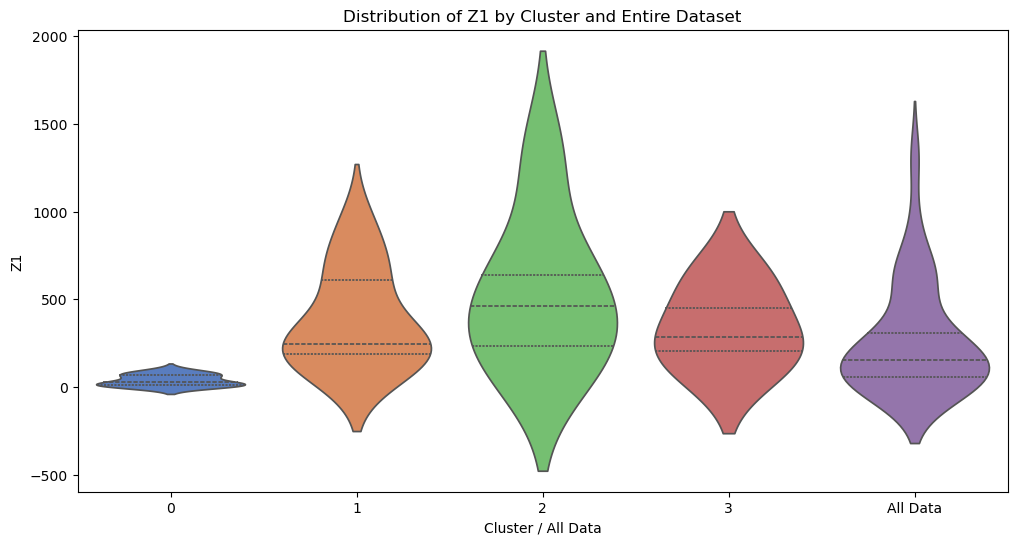

/tmp/ipykernel_232/2913003195.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=plot_data, inner="quart", palette="muted")


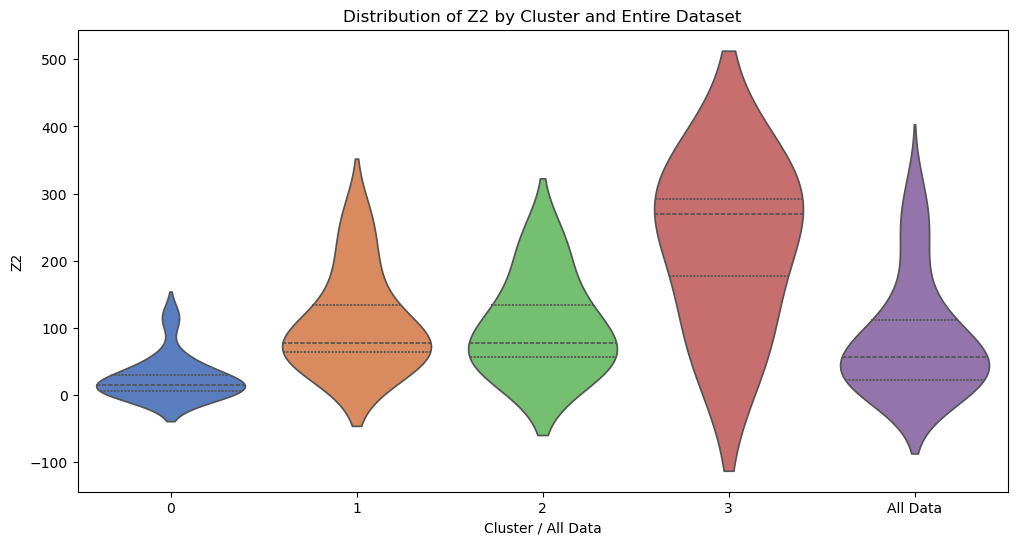

/tmp/ipykernel_232/2913003195.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=plot_data, inner="quart", palette="muted")


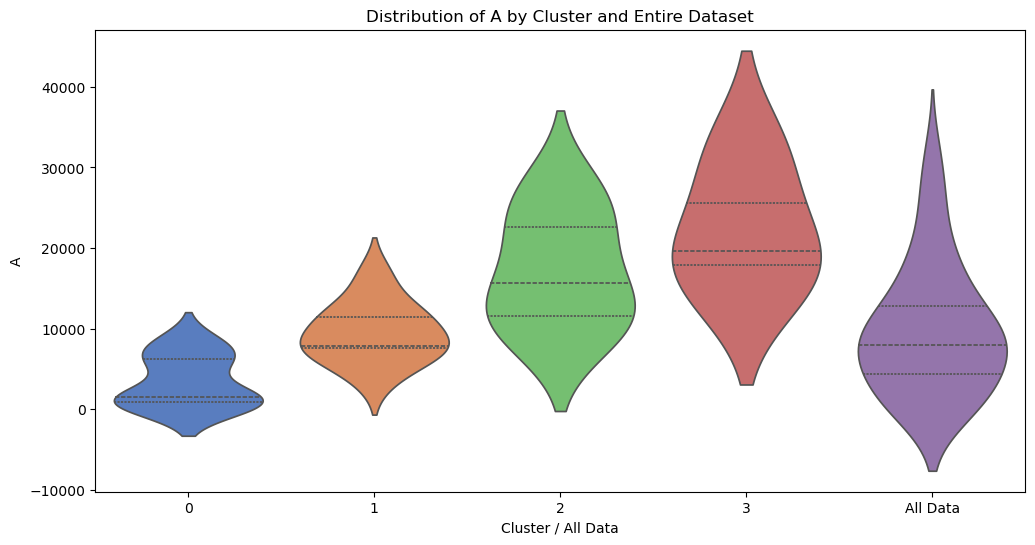

/tmp/ipykernel_232/2913003195.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=plot_data, inner="quart", palette="muted")


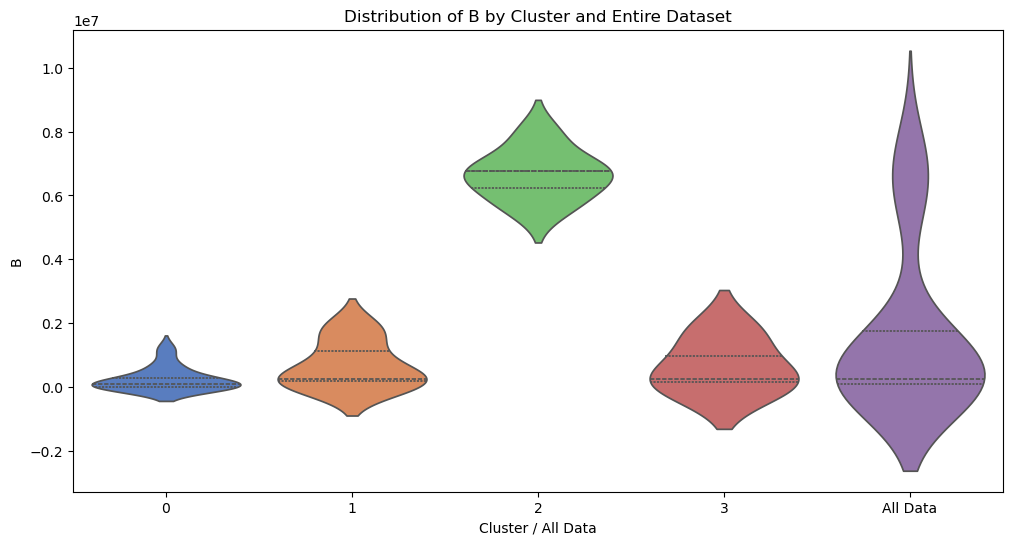

In [304]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `X_scaled` is your dataframe and '4_clusters_pca_3' contains the cluster labels

# Create a column representing the entire dataset distribution
combined_df['All Data'] = 'All Data'  # Assigning 'All Data' label to all rows

# List of features you want to plot
features = ['X1', 'X2', 'X3', 'Z1', 'Z2', 'A', 'B']  # Add more features as needed

# Create violin plots for each feature
for feature in features:
    plt.figure(figsize=(12, 6))
    
    # Combine the cluster labels with 'All Data' for comparison
    # Create a new DataFrame with an additional 'Cluster/All Data' column for comparison
    plot_data = pd.concat([combined_df[['scaled_4_clusters_pca_2', feature]], combined_df[['All Data', feature]]], axis=0)
    plot_data['Cluster'] = pd.concat([combined_df['scaled_4_clusters_pca_2'], combined_df['All Data']], axis=0)

    # Violin plot for individual clusters and the entire dataset
    sns.violinplot(x='Cluster', y=feature, data=plot_data, inner="quart", palette="muted")
    
    # Add the title and labels
    plt.title(f'Distribution of {feature} by Cluster and Entire Dataset')
    plt.xlabel('Cluster / All Data')
    plt.ylabel(feature)
    
    # Show plot
    plt.show()


/tmp/ipykernel_232/1117961430.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=plot_data, inner="quart", palette="muted")


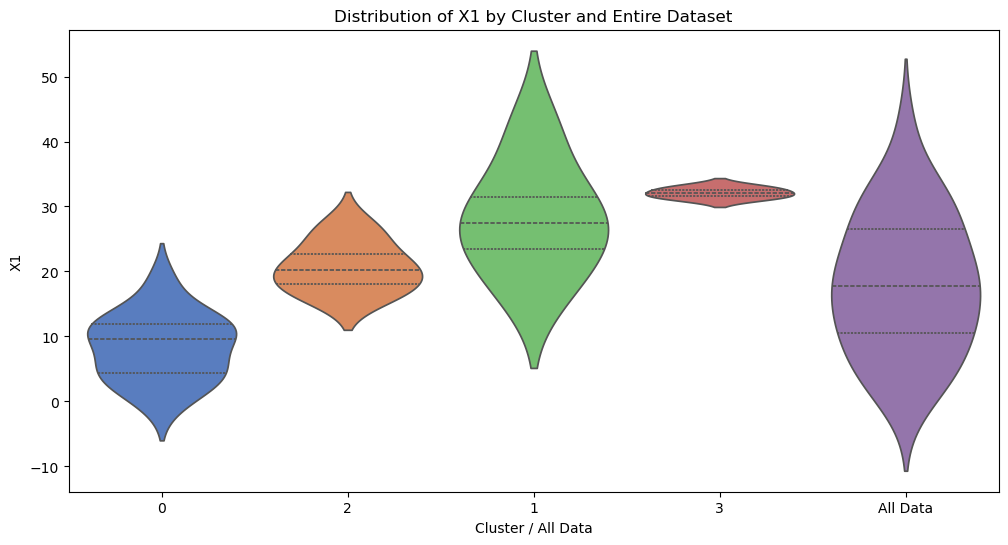

/tmp/ipykernel_232/1117961430.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=plot_data, inner="quart", palette="muted")


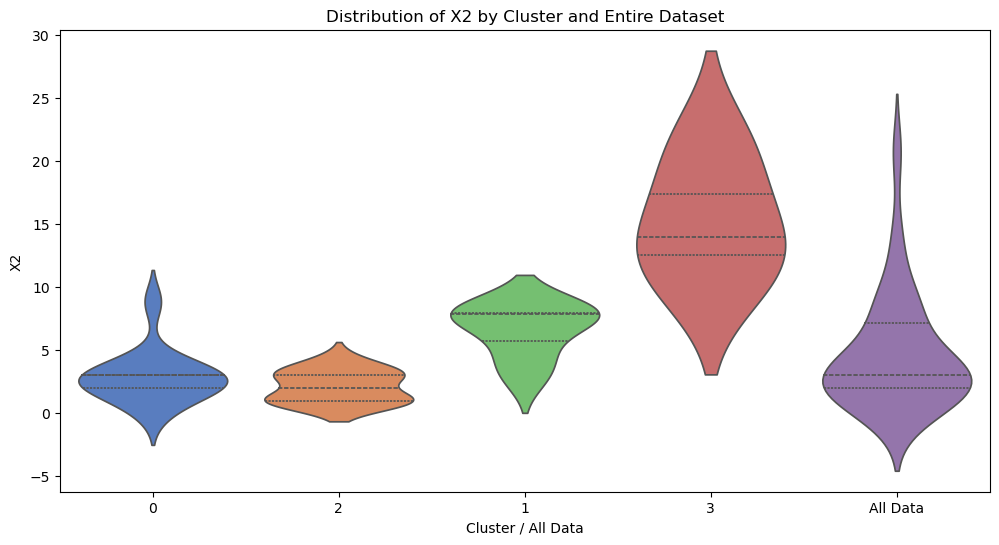

/tmp/ipykernel_232/1117961430.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=plot_data, inner="quart", palette="muted")


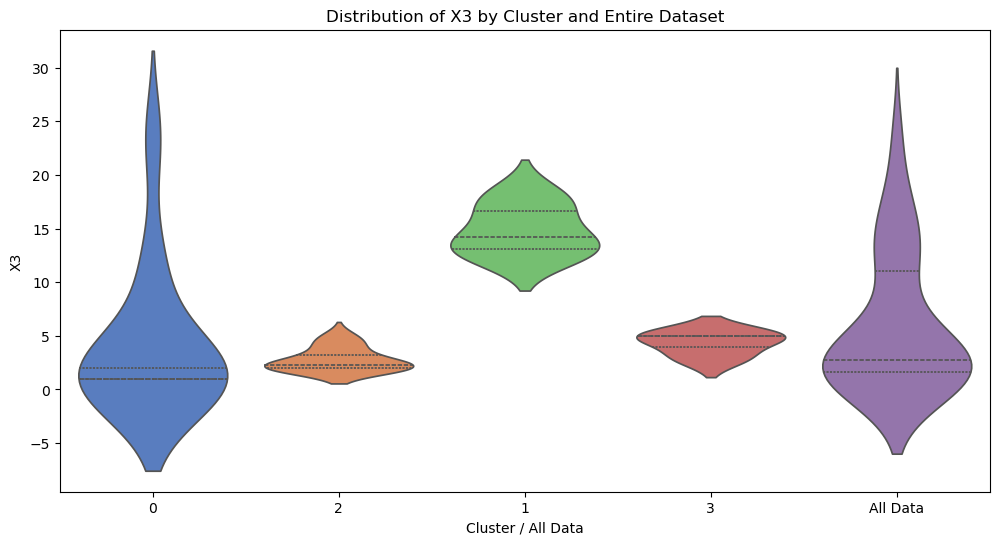

/tmp/ipykernel_232/1117961430.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=plot_data, inner="quart", palette="muted")


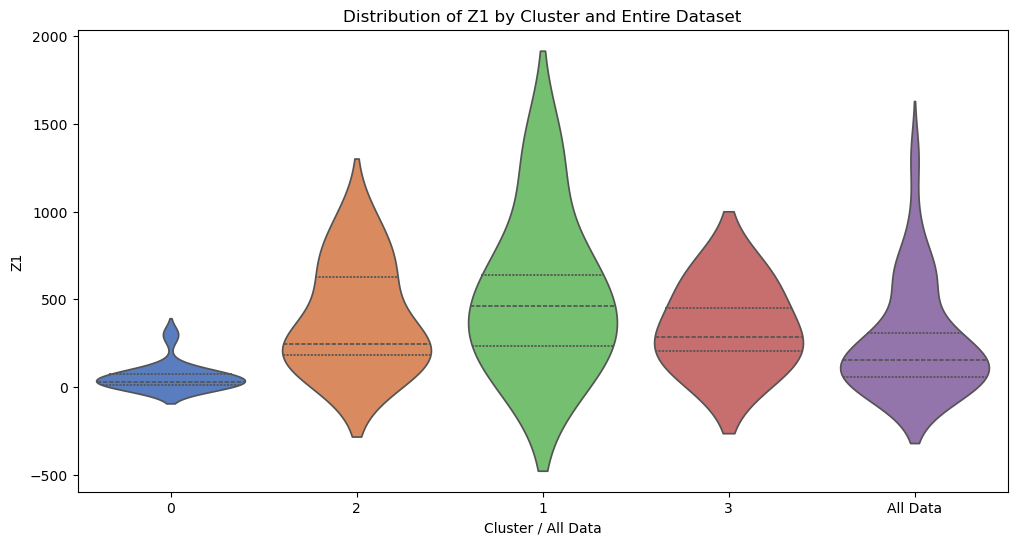

/tmp/ipykernel_232/1117961430.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=plot_data, inner="quart", palette="muted")


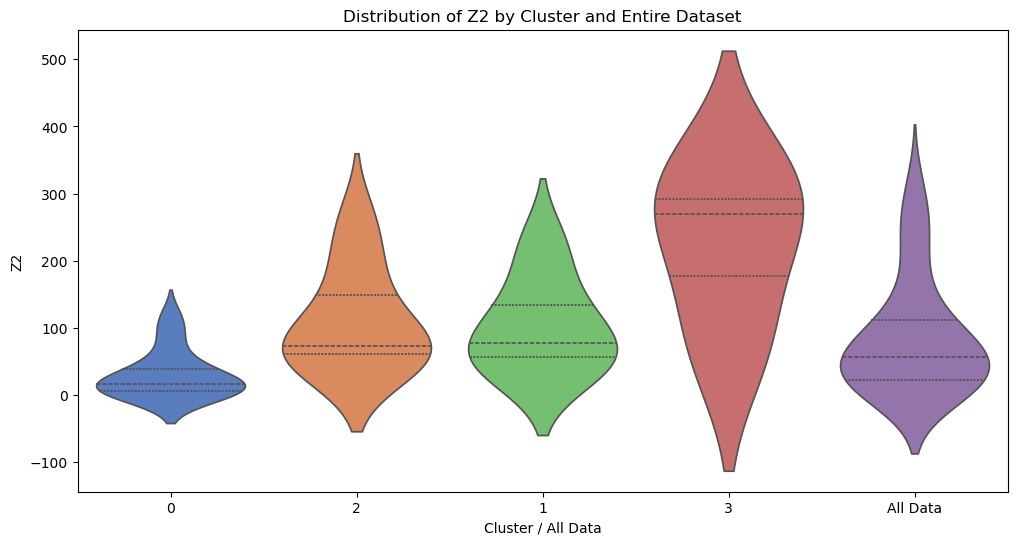

/tmp/ipykernel_232/1117961430.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=plot_data, inner="quart", palette="muted")


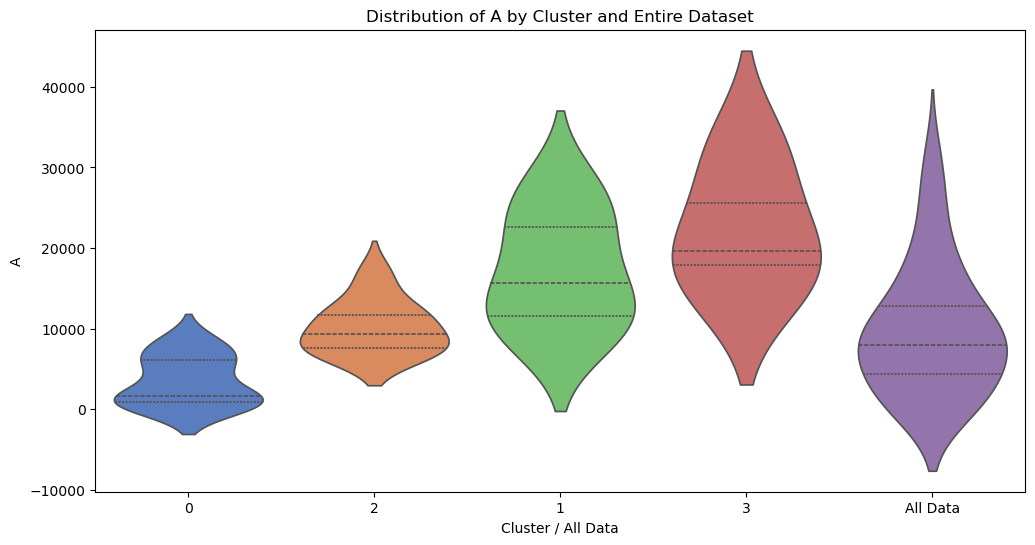

/tmp/ipykernel_232/1117961430.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=plot_data, inner="quart", palette="muted")


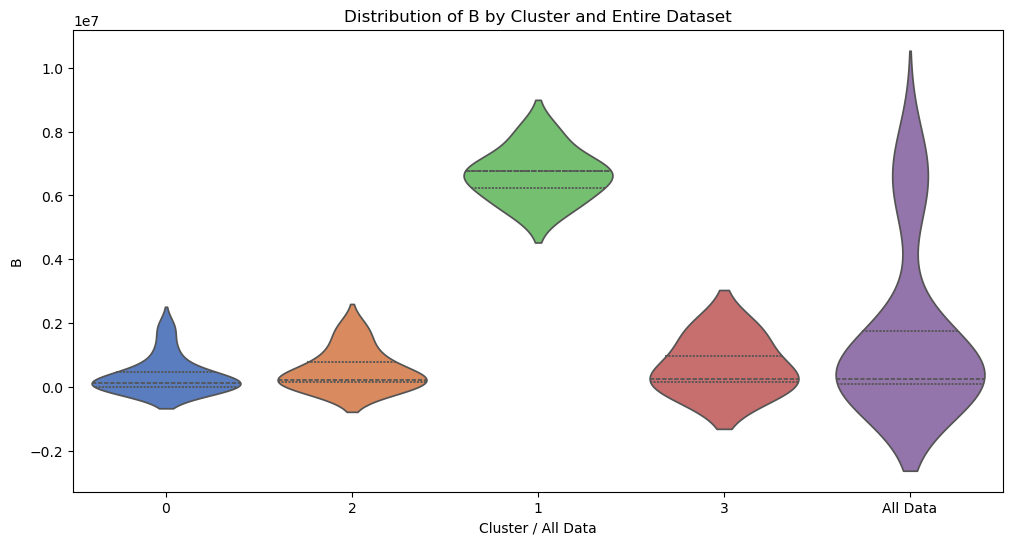

In [305]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `X_scaled` is your dataframe and '4_clusters_pca_3' contains the cluster labels

# Create a column representing the entire dataset distribution
combined_df['All Data'] = 'All Data'  # Assigning 'All Data' label to all rows

# List of features you want to plot
features = ['X1', 'X2', 'X3', 'Z1', 'Z2', 'A', 'B']  # Add more features as needed

# Create violin plots for each feature
for feature in features:
    plt.figure(figsize=(12, 6))
    
    # Combine the cluster labels with 'All Data' for comparison
    # Create a new DataFrame with an additional 'Cluster/All Data' column for comparison
    plot_data = pd.concat([combined_df[['scaled_4_clusters_all_features', feature]], combined_df[['All Data', feature]]], axis=0)
    plot_data['Cluster'] = pd.concat([combined_df['scaled_4_clusters_all_features'], combined_df['All Data']], axis=0)

    # Violin plot for individual clusters and the entire dataset
    sns.violinplot(x='Cluster', y=feature, data=plot_data, inner="quart", palette="muted")
    
    # Add the title and labels
    plt.title(f'Distribution of {feature} by Cluster and Entire Dataset')
    plt.xlabel('Cluster / All Data')
    plt.ylabel(feature)
    
    # Show plot
    plt.show()


/tmp/ipykernel_232/385107083.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=plot_data, inner="quart", palette="muted")


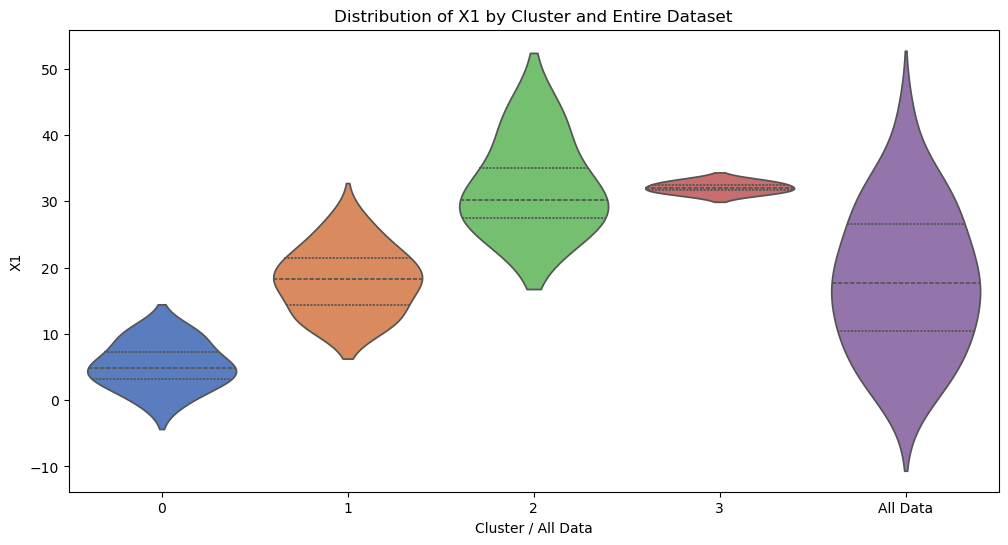

/tmp/ipykernel_232/385107083.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=plot_data, inner="quart", palette="muted")


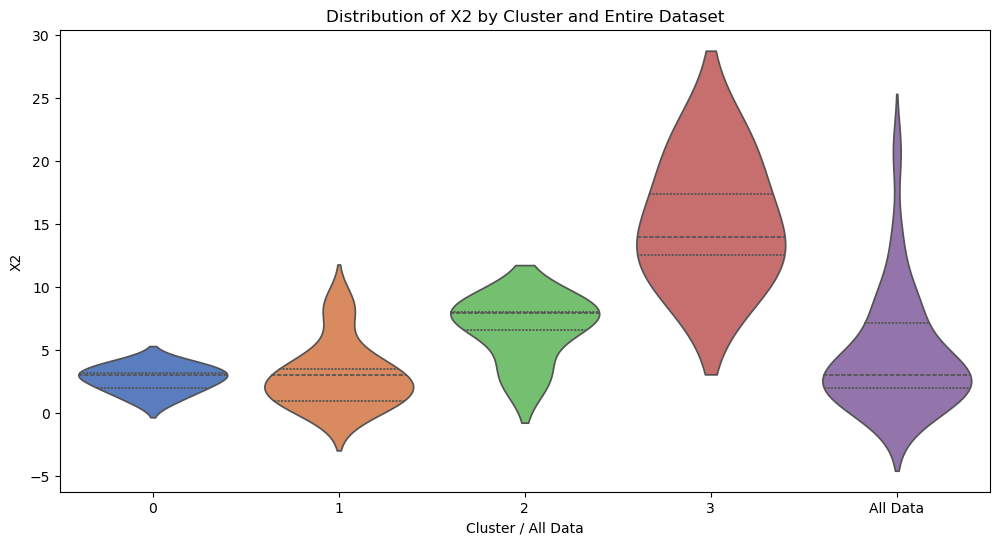

/tmp/ipykernel_232/385107083.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=plot_data, inner="quart", palette="muted")


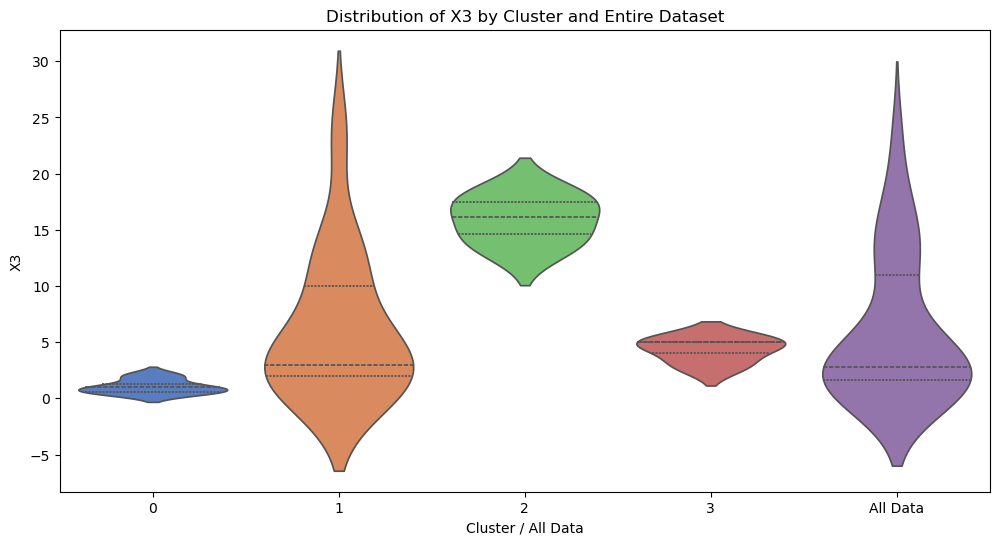

/tmp/ipykernel_232/385107083.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=plot_data, inner="quart", palette="muted")


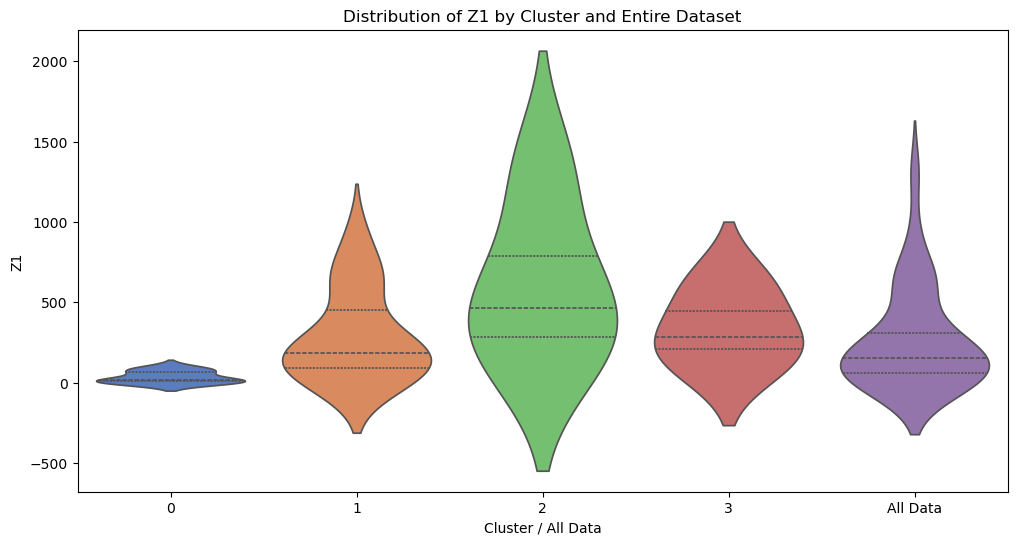

/tmp/ipykernel_232/385107083.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=plot_data, inner="quart", palette="muted")


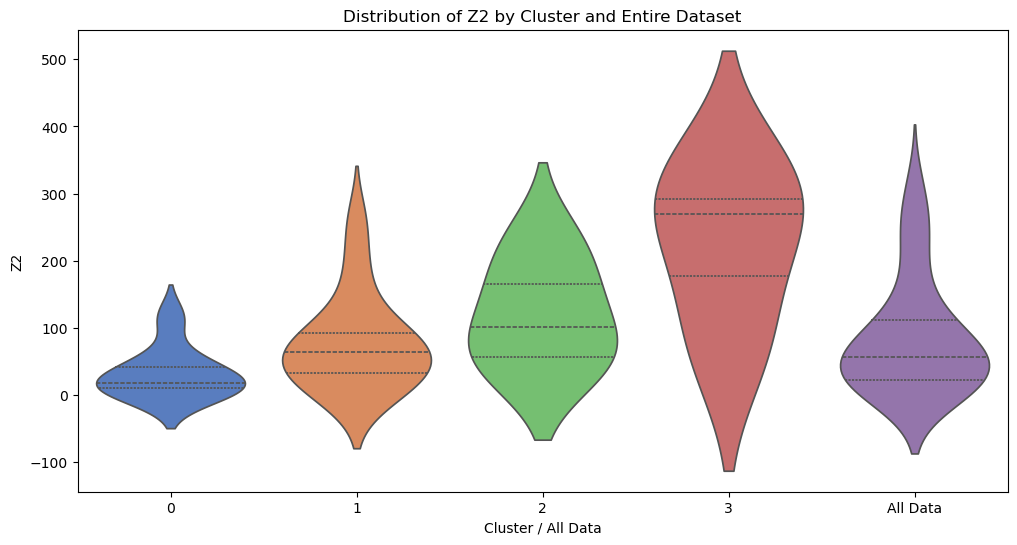

/tmp/ipykernel_232/385107083.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=plot_data, inner="quart", palette="muted")


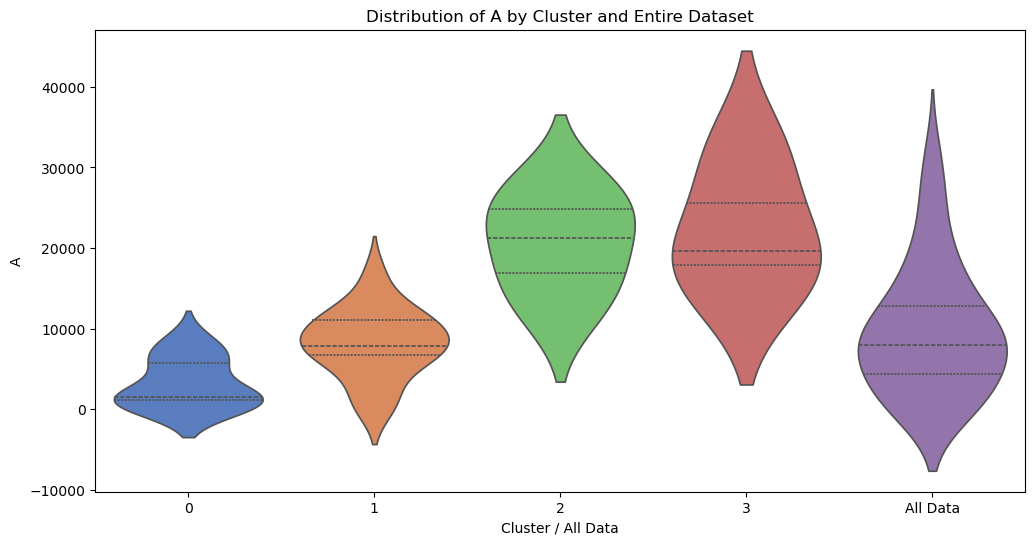

/tmp/ipykernel_232/385107083.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=plot_data, inner="quart", palette="muted")


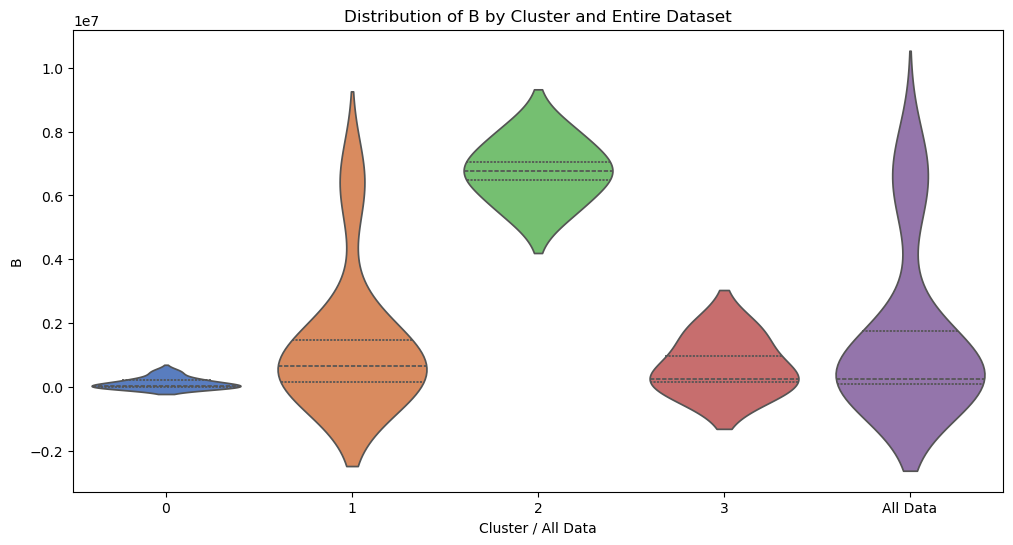

In [306]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `X_scaled` is your dataframe and '4_clusters_pca_3' contains the cluster labels

# Create a column representing the entire dataset distribution
combined_df['All Data'] = 'All Data'  # Assigning 'All Data' label to all rows

# List of features you want to plot
features = ['X1', 'X2', 'X3', 'Z1', 'Z2', 'A', 'B']  # Add more features as needed

# Create violin plots for each feature
for feature in features:
    plt.figure(figsize=(12, 6))
    
    # Combine the cluster labels with 'All Data' for comparison
    # Create a new DataFrame with an additional 'Cluster/All Data' column for comparison
    plot_data = pd.concat([combined_df[['scaled_4_clusters_X1X2', feature]], combined_df[['All Data', feature]]], axis=0)
    plot_data['Cluster'] = pd.concat([combined_df['scaled_4_clusters_X1X2'], combined_df['All Data']], axis=0)

    # Violin plot for individual clusters and the entire dataset
    sns.violinplot(x='Cluster', y=feature, data=plot_data, inner="quart", palette="muted")
    
    # Add the title and labels
    plt.title(f'Distribution of {feature} by Cluster and Entire Dataset')
    plt.xlabel('Cluster / All Data')
    plt.ylabel(feature)
    
    # Show plot
    plt.show()


## Function to Approximate y